# 2.- Rendimiento escolar

Lo contactan de una escuela Portuguesa para generar un modelo que identifique aquellos alumnos que presentan un bajo desempeño académico, medido en el promedio final del año escolar. Para ello le envían un archivo con registros sociodemográficos y conductuales de los alumnos de dos escuelas para perfilar a los estudiantes.

De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas asociadas a aspectos ambientales del alumno (de ​famrel a ​health​) y ver si éstas se pueden abstraer en categorías latentes.

## Descripción de la base de datos

Para responder esta pregunta deben utilizar el archivo `​students.csv`​. Las variables que componen la base se detallan a continuación.

- `school​`: Escuela del estudiante. (binaria: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira).
- `sex​`: Sexo del estudiante. (binaria: 'F' - Mujer o 'M' - Hombre).
- `age​`: Edad del estudiante. (numérica: de 15 a 22).
- `address​`: Ubicación de la casa del estudiante. (binaria: 'U' - urbana o 'R' - rural).
- `famsize​`: Tamaño de la familia. (binaria: 'LE3' - less or equal to 3 or 'GT3' - greater than 3).
- `Pstatus​`: Estado cohabitacional de los padres. (binaria: 'T' - cohabitando juntos o 'A' - viviendo separados).
- `Medu​`: Nivel educacional de la madre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
- `Fedu​`: Nivel educacional del padre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior). 
- `Mjob​`: Ocupación de la madre. (nominal: 'teacher' profesora, 'health' relacionada a salud, 'services' (e.g. administración pública o policía),  'at_home' en casa u 'other' otra).
- `job`:​ Ocupación del padre (nominal: 'teacher' profesor, 'health' relacionado a salud, 'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
- `reason​`: Razón para escoger la escuela (nominal: 'home' cercano a casa, 'reputation' reputación de la escuela, 'course' preferencia de cursos u 'other' otra).
- `guardian​`: Apoderado del estudiante (nominal: 'mother' madre, 'father' padre u 'other' otro).
- `traveltime​`: Tiempo de viaje entre hogar y colegio. Se debe codificar como:
  - 1 si es menos de 15 min,
  - 2 si es de 15 a 30 min,
  - 3 si es de 30 min. a 1 hora,
  - 4 - si es más de 1 hora.
- `studytime​`: Horas semanales dedicadas al estudio. Se debe codificar como:
  - 1 si es menos de 2 horas,
  - 2 si es de 2 a 5 horas,
  - 3 si es de 5 a 10 horas,
  - o 4 si es más de 10 horas.
- `failures​`: Número de clases reprobadas. (numérica: n si 1<=n<3, de lo contrario 4).
- `schoolsup​`: Apoyo educacional del colegio. (binaria: si o no).
- `famsup​`: Apoyo educacional familiar. (binaria: si o no).
- `paid​`: Clases particulares pagadas (matemáticas o portugués) (binaria: sí o no).
- `activities​`: Actividades extracurriculares. (binaria: si o no).
- `nursery​`: Asistió a guardería infantil. (binaria: si o no).
- `higher​`: Desea proseguir estudios superiores (binaria: si o no).
- `internet​`: Acceso a internet desde el hogar (binaria: si o no).
- `romantic​`: Relación romántica (binaria: si o no).
- `famrel​`: Calidad de las relaciones familiares. (numérica: de 1 - muy malas a 5 - excelentes).
- `freetime​`: Tiempo libre fuera del colegio (numérica: de 1 - muy poco a 5 - mucho).
- `goout​`: Salidas con amigos (numérica: de 1 - muy pocas a 5 - muchas).
- `Dalc​`: Consumo de alcohol en día de semana (numérica: de 1 - muy bajo a 5 - muy alto).
- `Walc​`: Consumo de alcohol en fines de semana (numérica: de 1 - muy bajo a 5 - muy alto).
- `health​`: Estado de salud actual (numérica: from 1 - muy malo to 5 - muy bueno).
- `absences​`: Cantidad de ausencias escolares (numérica: de 0 a 93).
- **`G1​`**: Notas durante el primer semestre (numérica: de 0 a 20). ​Este es uno de sus vectores objetivos para el modelo descriptivo​.
- `G2​`: Notas durante el segundo semestre (numérica: de 0 a 20). ​Este es uno de sus vectores objetivos para el modelo descriptivo​.
- `G3​`: Promedio final (numérica: de 0 a 20). ​Este es uno de sus vectores objetivos parael modelo descriptivo y el vector a predecir en el modelo predictivo​.

Acá se usa entrenamiento supervisado, que es una técnica de aprendizaje automático en la que un algoritmo aprende a realizar una tarea a partir de datos etiquetados previamente. El objetivo de esto es aprender una función que pueda mapear nuevas salidas basándose en los ejemplos de entrenamiento que se proporcionaron.


#### Se importan las librerías necesarias

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

from scipy import spatial
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

#### Se importa la base de datos a trabajar. Este en el comienzo estaba escrito en otro formato, venía separado por |, por lo que para poder leerse bien se tuvo que hacer un cambio en el mismo excel

In [42]:
df = pd.read_csv('C:/Users/javit/OneDrive/Escritorio/Solemne 2/Material/students.csv')

#### Se imprime la tabla de datos, acá se puede notar que hay datos faltantes representados por: nulidade, sem validade y zero. También se puede notar que en age, goout y health los números están acompañados con unas comillas. Y notar, que tenemos 395 filas (alumnos).

In [43]:
#data sin "pulir"
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,nulidade,U,GT3,A,4,4,at_home,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,1,GP,F,"""17""",U,GT3,T,1,1,at_home,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,2,GP,F,"""15""",U,LE3,T,1,1,at_home,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,3,GP,F,"""15""",U,GT3,T,4,2,health,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,4,GP,F,sem validade,U,GT3,T,3,3,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,MS,M,"""20""",U,LE3,A,2,2,services,...,5,5,"""4""",4,5,"""4""",11,9,9,9
391,391,MS,M,"""17""",U,LE3,T,3,1,services,...,2,4,"""5""",3,4,"""2""",3,14,16,16
392,392,MS,M,"""21""",R,GT3,T,1,1,other,...,5,5,"""3""",3,3,"""3""",3,10,8,7
393,393,MS,M,"""18""",R,LE3,T,3,2,services,...,4,4,"""1""",3,4,"""5""",0,11,12,10


#### Para poder trabajar con la tabla, se deben tratar los datos que estan reemplazados con nulidade, sem validade y zero, la primera ocurriencia fue reemplazar los datos con un 99, número arbitrario.

In [44]:
#"vaciamos" las casillas de datos perdidos
Data = df.replace(to_replace=['sem validade', 'zero', 'nulidade'],value='99')
#Observación: No se pueden transformar a int64 si es que value='', de esta forma no sé pueden dejar vacios, buscar otra solución aparte del 99

#### Se imprime la tabla con los datos no existentes reemplazados por el 99. Aún queda el problema de los números con "".

In [45]:
Data

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,99,U,GT3,A,4,4,at_home,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,1,GP,F,"""17""",U,GT3,T,1,1,at_home,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,2,GP,F,"""15""",U,LE3,T,1,1,at_home,...,4,3,"""2""",2,3,"""3""",10,99,8,10
3,3,GP,F,"""15""",U,GT3,T,4,2,health,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,4,GP,F,99,U,GT3,T,3,3,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,MS,M,"""20""",U,LE3,A,2,2,services,...,5,5,"""4""",4,5,"""4""",11,9,9,9
391,391,MS,M,"""17""",U,LE3,T,3,1,services,...,2,4,"""5""",3,4,"""2""",3,14,16,16
392,392,MS,M,"""21""",R,GT3,T,1,1,other,...,5,5,"""3""",3,3,"""3""",3,10,8,7
393,393,MS,M,"""18""",R,LE3,T,3,2,services,...,4,4,"""1""",3,4,"""5""",0,11,12,10


#### Se eliminan las comillas, esto ya que no se puede trabajar la tabla mas adelante si hay elementos string + elementos int, y se elimina la columna Unnamed: 0.

In [46]:
#Eliminamos caracteres no deseados
Data['age'] = Data['age'].apply(lambda x: x.replace('"',''))
Data['goout'] = Data['goout'].apply(lambda x: x.replace('"',''))
Data['health'] = Data['health'].apply(lambda x: x.replace('"',''))

Data =  Data.drop(columns='Unnamed: 0')
Data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,99,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,99,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,99,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Reemplazamos variables binarias, si pertenece al colegio GP = 0 y MS = 1
Si es alumno : 1, si es alumna : 0
Si vive en area Urbana : 0, area rural : 1
Si la familia tiene un numero menor o igual a 3 integrantes : 0, si tiene mas de 3 : 1
Si los padres son separados: 0, si conviven juntos: 1

para Mjob, trabajo de la madre, y Fjob, trabajo del padre asignamos que trabaja en:
1: profesor, 2: salud, 3: servicios, 4: en casa, 5: otro

para la razón por la cual asisten a la escuela asignamos:
1: cerca de casa, 2: reputacion de la escuela, 3: preferencia de curso, 4: otro

Guardian del alumno asignamos:
1: Madre, 2: Padre, 3: otro


In [47]:
#Reemplaamos variables binarias
Data['school'] = Data['school'].replace(to_replace=['GP','MS'], value=[0,1])
Data['sex'] = Data['sex'].replace(to_replace=['F','M'], value=[0,1])
Data['address'] = Data['address'].replace(to_replace=['U','R'], value=[0,1])
Data['famsize'] = Data['famsize'].replace(to_replace=['LE3','GT3'], value=[0,1])
Data['Pstatus'] = Data['Pstatus'].replace(to_replace=['A','T'], value=[0,1])

#Medu,Mjob : madre y Fedu,Fjob : padre
Data['Mjob'] = Data['Mjob'].replace(to_replace=['teacher','health','services','at_home','other'], value=[1,2,3,4,5])
Data['Fjob'] = Data['Fjob'].replace(to_replace=['teacher','health','services','at_home','other'], value=[1,2,3,4,5])
Data['reason'] = Data['reason'].replace(to_replace=['home','reputation','course','other'], value=[1,2,3,4])
Data['guardian'] = Data['guardian'].replace(to_replace=['mother','father','other'], value=[1,2,3])

#Transformamos las variables binarias de si y no a 1 y 0
Data = Data.replace(to_replace=['no','yes'], value=[0,1])

Data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,99,0,1,0,4,4,4,1,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,1,1,1,4,5,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,1,1,1,4,5,...,4,3,2,2,3,3,10,99,8,10
3,0,0,15,0,1,1,4,2,2,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,99,0,1,1,3,3,5,5,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,0,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,0,0,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,1,1,1,1,1,5,5,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,1,0,1,3,2,3,5,...,4,4,1,3,4,5,0,11,12,10


#### Realizamos un análisis para saber con exactitud cuantas filas y columnas hay, y el nombre de cada variables (columnas)

In [48]:
print("La base de datos tiene ", Data.shape[0], "observaciones y ", Data.shape[1], " columnas")
print("Las variables de la base de datos son ",[x for x in Data.columns])

La base de datos tiene  395 observaciones y  33  columnas
Las variables de la base de datos son  ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


#### Con el data.info() podemos saber de qué tipo es cada variable y cuantos objetos nulos hay en cada uno. En este caso, la gran mayoria es objeto y ninguno tiene nulos.

In [49]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    object
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    object
 7   Fedu        395 non-null    object
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    int64 
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    object
 13  studytime   395 non-null    object
 14  failures    395 non-null    object
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#### Como vimos que teníamos muchos tipo objeto y algunos enteros, se analizó que no se puede hacer la matriz de correlaciones con valores tipo objeto, por lo que fue necesario transformalos todos a enteros, esto creando un nuevo set de datos llamado DaraCorr.

In [50]:
#Creamos un nuevo set de datos a partir de la transformacion a enteros, esto para poder ver la matriz de correlaciones y el mapa de calor
DataCorr = Data.astype(np.int64)
DataCorr.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Ahora, nos dimos cuenta que en otros casos, puede ser muy dificil llegar y reemplazar por x número cada espacio donde no haya un valor, y lo mas fácil en cualquier caso sería eliminar las filas. Pero para poder hacerlo, tuvimos que analizar si es que eliminando las columnas varían sus valores promedios o desviación estándar. Se utiliza un .describe() para obtener estos valores del dataframe que se ha estado trabajando.

In [51]:
DataCorr.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1.367089,1.222785,17.531646,0.724051,1.706329,2.387342,3.473418,3.746835,4.934177,3.956962,...,5.151899,3.713924,4.316456,2.222785,3.518987,4.536709,6.675949,11.825316,10.713924,11.118987
std,11.073333,8.579043,8.348129,7.032001,9.863527,12.017726,8.438261,10.853043,11.781674,1.294530,...,10.676946,6.878325,10.791687,8.523541,10.900869,9.664186,12.295074,9.426303,3.761505,8.942201
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,3.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,0.000000,1.000000,1.000000,3.000000,3.000000,4.000000,5.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,1.000000,4.000000,4.000000,5.000000,5.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.500000,13.000000,14.000000
max,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,5.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,19.000000,99.000000


#### Todos los valores de 99 se pasan a NaN para poder sacar sus datos

In [52]:
DataCorr = Data.astype(np.int64)
DataNan = DataCorr.replace(to_replace=99, value=np.nan)
DataNan

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,NaN,0.0,1.0,0.0,4.0,4.0,4.0,1,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6,6.0
1,0.0,0.0,17.0,0.0,1.0,1.0,1.0,1.0,4.0,5,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5,6.0
2,0.0,0.0,15.0,0.0,0.0,1.0,1.0,1.0,4.0,5,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,NaN,8,10.0
3,0.0,0.0,15.0,0.0,1.0,1.0,4.0,2.0,2.0,3,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14,15.0
4,0.0,0.0,NaN,0.0,1.0,1.0,3.0,3.0,5.0,5,...,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,20.0,0.0,0.0,0.0,2.0,2.0,3.0,3,...,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9,9.0
391,1.0,1.0,17.0,0.0,0.0,1.0,3.0,1.0,3.0,3,...,2.0,4.0,5.0,3.0,4.0,2.0,3.0,14.0,16,16.0
392,1.0,1.0,21.0,1.0,1.0,1.0,1.0,1.0,5.0,5,...,5.0,5.0,3.0,3.0,3.0,3.0,3.0,10.0,8,7.0
393,1.0,1.0,18.0,1.0,0.0,1.0,3.0,2.0,3.0,5,...,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,12,10.0


#### Creamos una lista llamadas eliminadas que es donde entrarán todas las filas que posean un nulidade, sem validade y un zero, para luego eliminarlas y crear un nuevo df que en vez de tener 394 filas, tendrá 284.

In [53]:
eliminadas = []

for indice, fila in df.iterrows():
    if 'nulidade' in fila.values or 'sem validade' in fila.values or 'zero' in fila.values:
        eliminadas.append(indice)

tabla = df.drop(eliminadas)
tabla

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,1,GP,F,"""17""",U,GT3,T,1,1,at_home,...,5,3,"""3""",1,1,"""3""",4,5,5,6
3,3,GP,F,"""15""",U,GT3,T,4,2,health,...,3,2,"""2""",1,1,"""5""",2,15,14,15
5,5,GP,M,"""16""",U,LE3,T,4,3,services,...,5,4,"""2""",1,2,"""5""",10,15,15,15
6,6,GP,M,"""16""",U,LE3,T,2,2,other,...,4,4,"""4""",1,1,"""3""",0,12,12,11
7,7,GP,F,"""17""",U,GT3,A,4,4,other,...,4,1,"""4""",1,1,"""1""",6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,MS,M,"""20""",U,LE3,A,2,2,services,...,5,5,"""4""",4,5,"""4""",11,9,9,9
391,391,MS,M,"""17""",U,LE3,T,3,1,services,...,2,4,"""5""",3,4,"""2""",3,14,16,16
392,392,MS,M,"""21""",R,GT3,T,1,1,other,...,5,5,"""3""",3,3,"""3""",3,10,8,7
393,393,MS,M,"""18""",R,LE3,T,3,2,services,...,4,4,"""1""",3,4,"""5""",0,11,12,10


#### Se hace el mismo procedimiento que con el data frame anterior, se elimina la columna Unnamed:0, se eliminan las comillas en las columnas de age, goout y health, y se transforman a variables binarias school, sex, addres, famsize, Pstatus, Mjob, Fjob, reason y guardian. No será 0 y Si será 1.

In [54]:
tabla = tabla.drop(columns='Unnamed: 0')

tabla['age'] = tabla['age'].apply(lambda x: x.replace('"',''))
tabla['goout'] = tabla['goout'].apply(lambda x: x.replace('"',''))
tabla['health'] = tabla['health'].apply(lambda x: x.replace('"',''))

tabla['school'] = tabla['school'].replace(to_replace=['GP','MS'], value=[0,1])
tabla['sex'] = tabla['sex'].replace(to_replace=['F','M'], value=[0,1])
tabla['address'] = tabla['address'].replace(to_replace=['U','R'], value=[0,1])
tabla['famsize'] = tabla['famsize'].replace(to_replace=['LE3','GT3'], value=[0,1])
tabla['Pstatus'] = tabla['Pstatus'].replace(to_replace=['A','T'], value=[0,1])

tabla['Mjob'] = tabla['Mjob'].replace(to_replace=['teacher','health','services','at_home','other'], value=[1,2,3,4,5])
tabla['Fjob'] = tabla['Fjob'].replace(to_replace=['teacher','health','services','at_home','other'], value=[1,2,3,4,5])
tabla['reason'] = tabla['reason'].replace(to_replace=['home','reputation','course','other'], value=[1,2,3,4])
tabla['guardian'] = tabla['guardian'].replace(to_replace=['mother','father','other'], value=[1,2,3])

tabla = tabla.replace(to_replace=['no','yes'], value=[0,1])

tabla = tabla.astype(np.int64)

tabla

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,0,0,17,0,1,1,1,1,4,5,...,5,3,3,1,1,3,4,5,5,6
3,0,0,15,0,1,1,4,2,2,3,...,3,2,2,1,1,5,2,15,14,15
5,0,1,16,0,0,1,4,3,3,5,...,5,4,2,1,2,5,10,15,15,15
6,0,1,16,0,0,1,2,2,5,5,...,4,4,4,1,1,3,0,12,12,11
7,0,0,17,0,1,0,4,4,5,1,...,4,1,4,1,1,1,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,0,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,0,0,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,1,1,1,1,1,5,5,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,1,0,1,3,2,3,5,...,4,4,1,3,4,5,0,11,12,10


#### Como se mencionó anteriormente, se hizo un .describe() para poder saber el valor promedio y la desviación estándar de los datos reemplazados con 99, y ahora se hizo con la tabla con mas de 100 filas menos. Mostramos ambas tablas una arriba de la otra para que se pueda ver la comparación de que los valores varían en lo más mínimo, por lo tanto la eliminación de las filas con aquellos datos no influye.

In [55]:
tabla.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.00000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.00000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,0.130282,0.482394,16.707746,0.246479,0.735915,0.90493,2.774648,2.521127,3.475352,3.964789,...,3.940141,3.18662,3.084507,1.482394,2.239437,3.626761,5.588028,10.933099,10.640845,10.394366
std,0.337207,0.500572,1.284238,0.431721,0.441623,0.29383,1.095409,1.091038,1.447341,1.301871,...,0.881659,1.02117,1.076527,0.879512,1.285580,1.319113,8.156335,3.289199,3.789220,4.565902
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.00000,2.000000,2.000000,3.000000,3.000000,...,4.000000,3.00000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,0.000000,1.000000,1.00000,3.000000,3.000000,4.000000,5.000000,...,4.000000,3.00000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,10.500000,11.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,1.00000,4.000000,3.000000,5.000000,5.000000,...,5.000000,4.00000,4.000000,2.000000,3.000000,5.000000,7.000000,13.000000,13.000000,13.000000
max,1.000000,1.000000,21.000000,1.000000,1.000000,1.00000,4.000000,4.000000,5.000000,5.000000,...,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [56]:
DataNan.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,390.000000,392.000000,391.000000,393.000000,391.000000,389.000000,392.000000,390.000000,389.000000,395.000000,...,390.000000,393.000000,390.000000,392.000000,390.000000,391.000000,391.000000,391.000000,395.000000,392.000000
mean,0.115385,0.474490,16.698210,0.223919,0.710997,0.897172,2.742347,2.525641,3.483290,3.956962,...,3.948718,3.229008,3.102564,1.482143,2.294872,3.570332,5.731458,10.933504,10.713924,10.446429
std,0.319896,0.499987,1.279412,0.417400,0.453880,0.304125,1.095185,1.088906,1.418891,1.294530,...,0.896973,0.996664,1.117629,0.893104,1.293736,1.377303,8.025089,3.320593,3.761505,4.568007
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,3.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,0.000000,1.000000,1.000000,3.000000,2.500000,4.000000,5.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,1.000000,4.000000,3.000000,5.000000,5.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Usamos las dos tablas anteriores para validar nuestra decisión de eliminar los nulos

Definimos la funcion fetch_features, la cual nos va a entregar una lista de las correlaciones del vector objetivo con las otras columnas, esto para poder tener una vision general de como se relacionan las diferentes columnas con los vectores objetivos, que para este caso serian los promedios de notas, definidos tanto por G1, G2 y G3.

In [57]:
def fetch_features(dataframe, objetive_vector):
    """
    :param dataframe: database to use
    :param objetive_vector str: name of the objetive vector
    :type dataframe: pandas.core.frame.DataFrame
    :return: A pandas.core.frame.DataFrame with the first column with columns names, named 'attibutes', used as index. A second column names 'corr' with the correlation values. A third column named 'abs_corr' with the absolute values of the 'corr' column, and also the 'abs_corr' is used to sort the list in descending order
    """
    columns = dataframe.columns
    attr_name, pearson_r, abs_pearson_r = [],[],[]
    for col in columns:
        if col != objetive_vector:
            attr_name.append(col)
            temp = dataframe[col].corr(dataframe[objetive_vector])
            pearson_r.append(temp)
            abs_pearson_r.append(abs(temp))
    return pd.DataFrame({'attribute': attr_name ,'corr': pearson_r,'abs_corr':abs_pearson_r}).set_index('attribute').sort_values(by=['abs_corr'], ascending=False)

In [73]:
def plot_in_square(data, columns):
    num_plots = len(columns)
    num_cols = int(np.ceil(np.sqrt(num_plots)))
    num_rows = int(np.ceil(num_plots / num_cols))
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5)
    
    for i, column in enumerate(columns):
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col]
        sm.qqplot(data[column], line='q', ax=ax)
        ax.set_title(f"Linealidad de {column}")
    
    plt.tight_layout()
    plt.show()

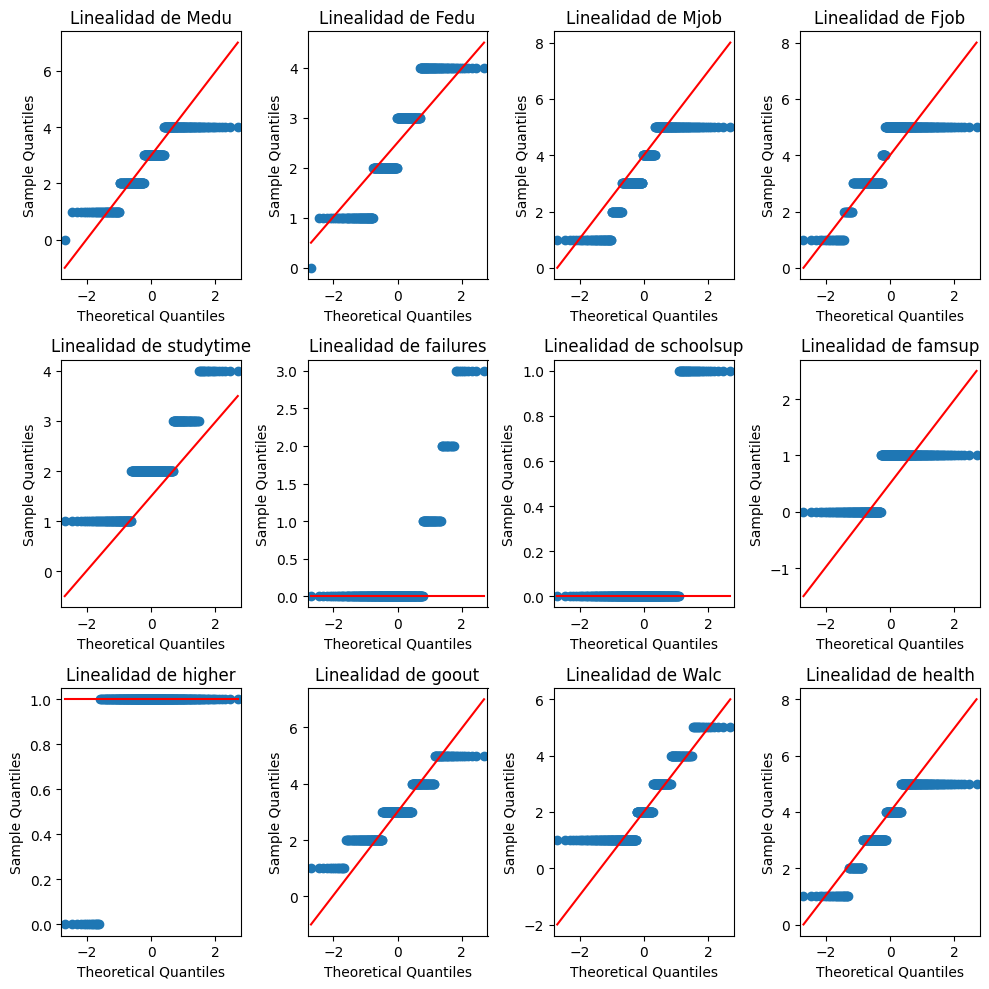

In [83]:
plot_in_square(DataExtractG1, b)

In [58]:
result = fetch_features(tabla, objetive_vector = 'G1')
result

,corr,abs_corr
attribute,,
G2,0.848606,0.848606
G3,0.803384,0.803384
failures,-0.328676,0.328676
goout,-0.226923,0.226923
schoolsup,-0.206195,0.206195
Medu,0.189984,0.189984
Fedu,0.181079,0.181079
Fjob,-0.165591,0.165591
higher,0.153411,0.153411


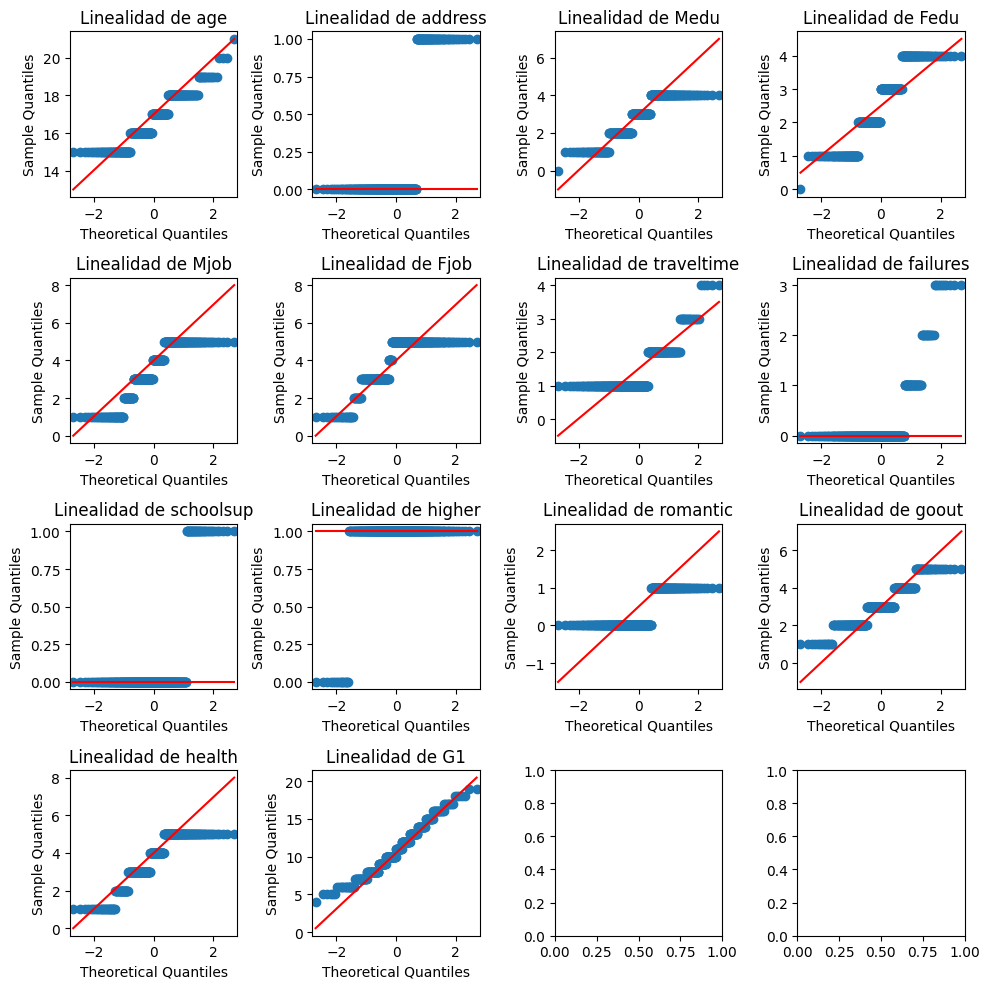

In [85]:
plot_in_square(DataExtractG2, d)

In [59]:
re2 = fetch_features(tabla, objetive_vector= 'G2')
re2

,corr,abs_corr
attribute,,
G3,0.902984,0.902984
G1,0.848606,0.848606
failures,-0.322600,0.322600
goout,-0.231616,0.231616
Medu,0.179638,0.179638
address,-0.153058,0.153058
health,-0.152749,0.152749
higher,0.152379,0.152379
traveltime,-0.132120,0.132120


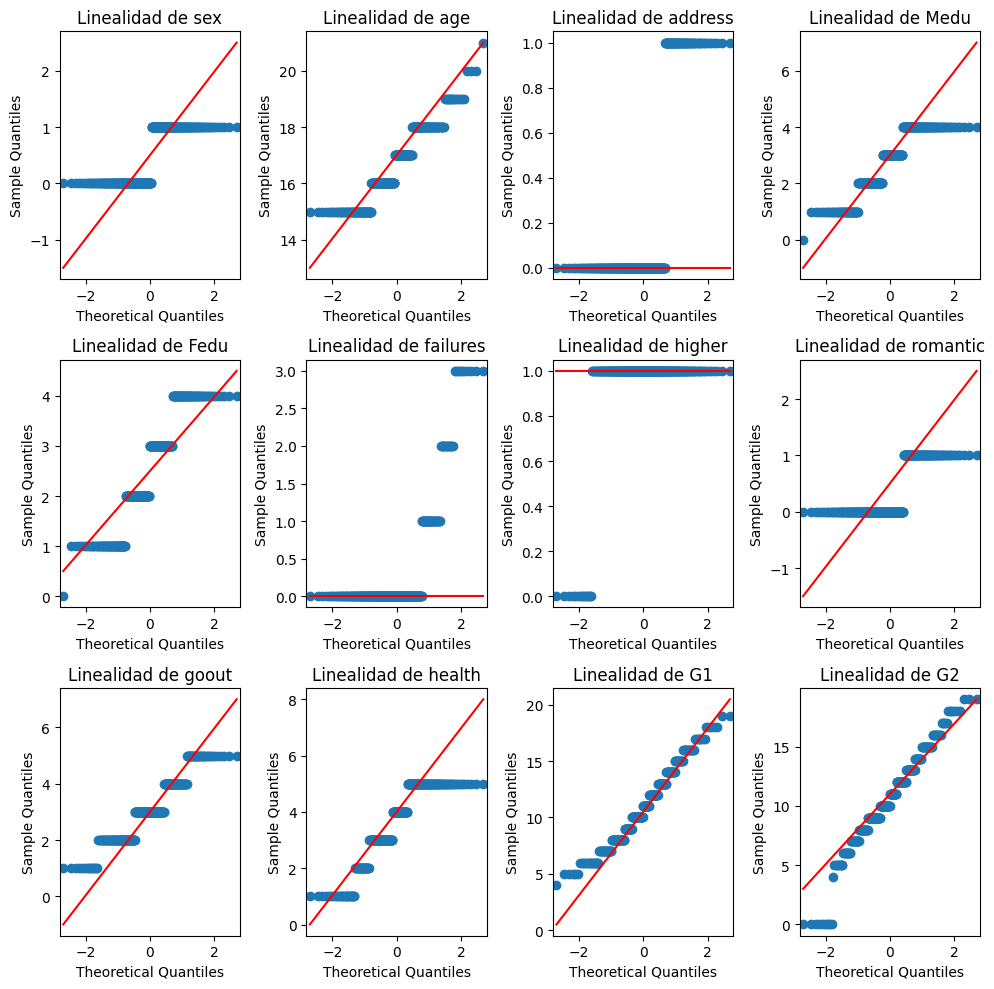

In [92]:
plot_in_square(tabla, f)

In [60]:
re3 = fetch_features(tabla, objetive_vector ='G3')
re3

,corr,abs_corr
attribute,,
G2,0.902984,0.902984
G1,0.803384,0.803384
failures,-0.345628,0.345628
goout,-0.221752,0.221752
Medu,0.180326,0.180326
higher,0.162044,0.162044
age,-0.132134,0.132134
address,-0.119397,0.119397
health,-0.116279,0.116279


mismo analisis pero para los datos de la psico,.

In [105]:
psi_nais = tabla.iloc[:,[23,24,25,26,27,28,30,31,32]]

In [104]:
ra1 = fetch_features( psi_nais , objetive_vector ='G1')
ra1

,corr,abs_corr
attribute,,
goout,-0.226923,0.226923
health,-0.128751,0.128751
Walc,-0.122382,0.122382
Dalc,-0.080415,0.080415
famrel,0.033950,0.033950
freetime,0.026875,0.026875


In [108]:
ra2 = fetch_features( psi_nais , objetive_vector ='G2')
ra2

,corr,abs_corr
attribute,,
G3,0.902984,0.902984
G1,0.848606,0.848606
goout,-0.231616,0.231616
health,-0.152749,0.152749
Walc,-0.079485,0.079485
Dalc,-0.061280,0.061280
freetime,0.011904,0.011904
famrel,-0.003285,0.003285


In [107]:
ra3 = fetch_features( psi_nais , objetive_vector ='G3')
ra3

,corr,abs_corr
attribute,,
G2,0.902984,0.902984
G1,0.803384,0.803384
goout,-0.221752,0.221752
health,-0.116279,0.116279
famrel,0.069963,0.069963
Dalc,-0.052820,0.052820
freetime,0.037968,0.037968
Walc,-0.033601,0.033601


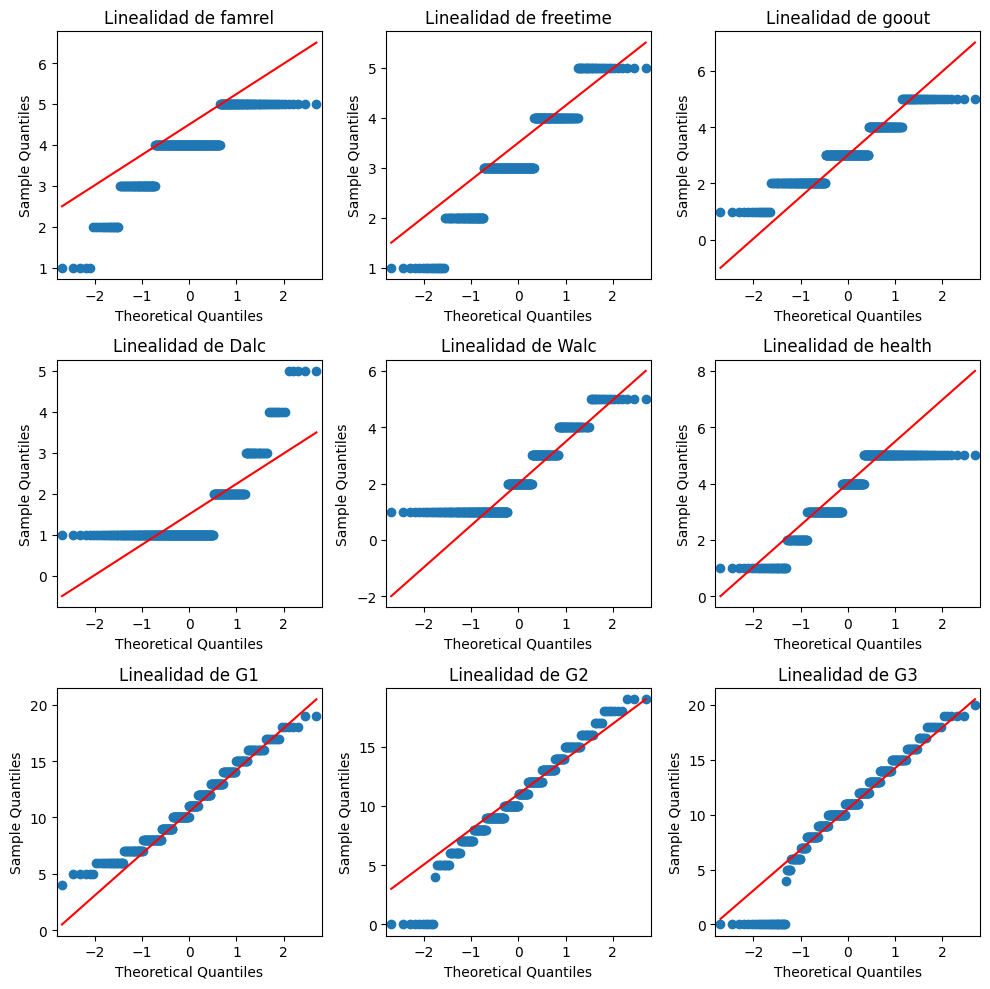

In [110]:
plot_in_square(psi_nais , tabla.iloc[:,[23,24,25,26,27,28,30,31,32]].columns)

Graficando lo anterior se presenta un mapa de calor generado por seaborn, representado el valor absoluto de la corelacion de las diferentes coluumnas entres si.

<Axes: >

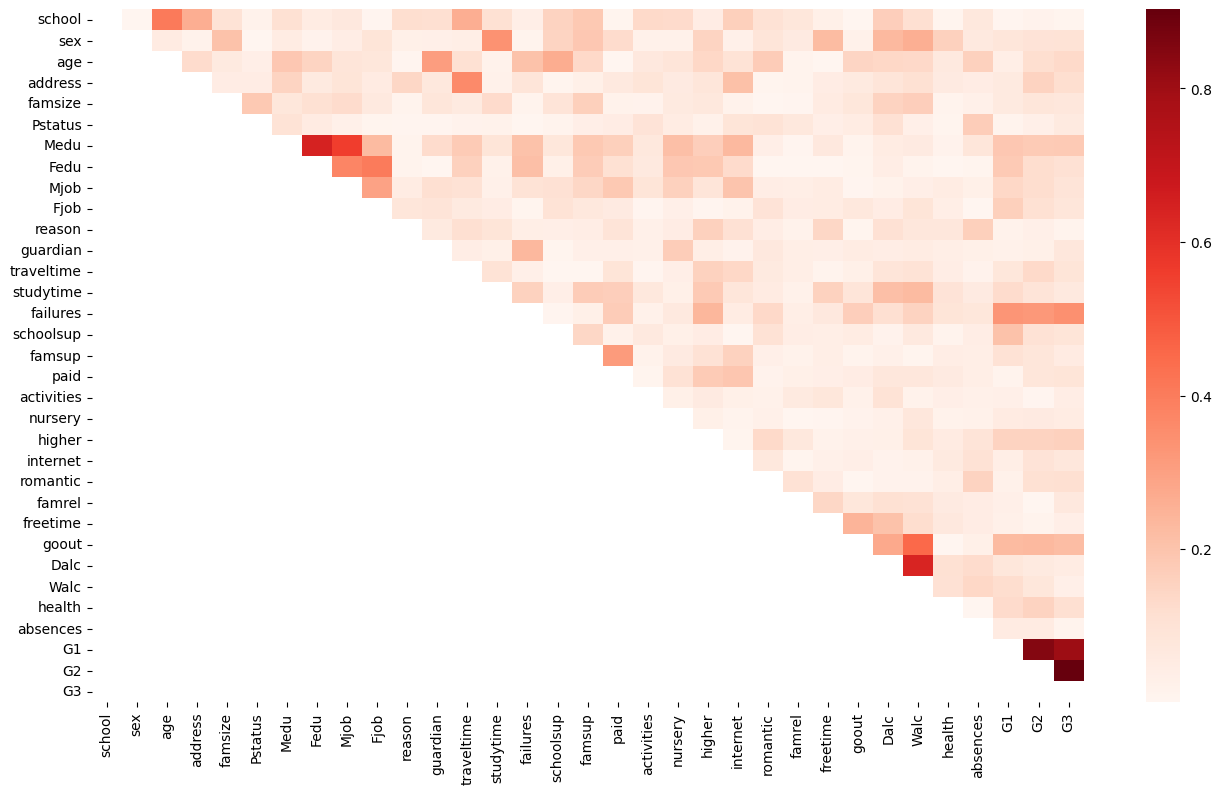

In [61]:
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(tabla.corr().abs(), cmap='Reds', mask=np.tril(tabla.corr()))

Creamos listas para guardar las variables que tienen un porcentaje especifico de correlación con nuestro vector objetivo.

In [88]:
NewMatrixG1 = tabla.drop(columns=['G2','G3']).corr().abs()

a = []
b = []
for i in NewMatrixG1:
    if 1 > NewMatrixG1[i]['G1'] > 0.1:
        a.append(NewMatrixG1[i]['G1'])
        b.append(i)

print(a,b)

[0.18998437110343347, 0.18107914452768598, 0.1402624614559367, 0.16559060164779968, 0.1260204948762037, 0.3286755144733325, 0.2061947023524878, 0.10425785432638687, 0.1534109020628616, 0.2269227633510481, 0.12238153993894726, 0.12875085445953965] ['Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'famsup', 'higher', 'goout', 'Walc', 'health']


In [89]:
NewMatrixG1 = tabla.drop(columns=['G2','G3']).corr().abs()

a = []
b = []
for i in NewMatrixG1:
    if 1 > NewMatrixG1[i]['G1'] > 0.1:
        a.append(NewMatrixG1[i]['G1'])
        b.append(i)

print(a,b)

[0.18998437110343347, 0.18107914452768598, 0.1402624614559367, 0.16559060164779968, 0.1260204948762037, 0.3286755144733325, 0.2061947023524878, 0.10425785432638687, 0.1534109020628616, 0.2269227633510481, 0.12238153993894726, 0.12875085445953965] ['Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'famsup', 'higher', 'goout', 'Walc', 'health']


In [90]:
NewMatrixG2 = tabla.drop(columns=['G3']).corr().abs()

c = []
d = []
for i in NewMatrixG2:
    if 1 > NewMatrixG2[i]['G2'] > 0.1:
        c.append(NewMatrixG2[i]['G2'])
        d.append(i)

print(c,d)

[0.11894828046802672, 0.15305807616362424, 0.17963833929388773, 0.12321207177098185, 0.12017233322355525, 0.11001782921382086, 0.1321200422753557, 0.32260027911732975, 0.10486875909953622, 0.15237927110863433, 0.11025088144408308, 0.23161576826786548, 0.15274857548961188, 0.8486056439466493] ['age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'failures', 'schoolsup', 'higher', 'romantic', 'goout', 'health', 'G1']


In [91]:
NewMatrixG3 = tabla.corr().abs()

e = []
f = []
for i in NewMatrixG3:
    if 1 > NewMatrixG3[i]['G3'] > 0.1:
        e.append(NewMatrixG3[i]['G3'])
        f.append(i)

print(e,f)

[0.10199502095451049, 0.13213437109082365, 0.11939728280415758, 0.18032608803959277, 0.10613941060614453, 0.34562831608021327, 0.16204435229313305, 0.11537689157043338, 0.22175199671731102, 0.11627933028163623, 0.8033838021407256, 0.9029836457772379] ['sex', 'age', 'address', 'Medu', 'Fedu', 'failures', 'higher', 'romantic', 'goout', 'health', 'G1', 'G2']


Creamos un par de dataframes para G1 y G2, quitando las columnas que no deberian tener correlación alguna con el vector objetivo.

In [66]:
DataExtractG1 = tabla.drop(columns=['G2','G3'])
DataExtractG2 = tabla.drop(columns=['G3'])

Se empieza a crear el modelo de regresión lineal para estudiar las predicciones de promedios

In [86]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Entrenando el modelo en una bateria de preguntas para G1
y = DataExtractG1['G1']
X = DataExtractG1.drop(columns='G1')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=9013)

modelo = linear_model.LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)#.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
#lista de coeficientes
print("La lista de pendientes: :", modelo.coef_)
#Interceptos
print("El intercepto del modelo es :", modelo.intercept_)

prediccionesG1 = modelo.predict(X)
m1_mse = mean_squared_error(y, prediccionesG1).round(1)
m1_r2 = r2_score(y, prediccionesG1).round(2)

print("Mean Squared Error: ", m1_mse)
print("R-cuadrado: ", m1_r2)

La lista de pendientes: : [ 0.11777013  0.16642017 -0.22288907  0.09399561 -1.16292593 -0.01071842
  0.29815296 -0.27141937 -0.16602786 -0.3574725  -0.02520589  0.74833072
 -0.40689943  0.09732329 -1.25779968 -1.36202643 -1.076968    0.13467186
 -0.09448539 -0.03480775  0.96840765 -0.45154028  0.34263176  0.16398302
  0.48931781 -0.71162773 -0.36129353  0.22059385 -0.16661488 -0.01250616]
El intercepto del modelo es : 17.807311044668737
Mean Squared Error:  8.4
R-cuadrado:  0.22


In [ ]:
#Entrenando el modelo en una bateria de preguntas para G1 con variables  de mayor correlación
y = DataExtractG1['G1']
X = DataExtractG1.loc[:,b]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=9013)

modelo = linear_model.LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)

print("La lista de pendientes: :", modelo.coef_)
print("El intercepto del modelo es :", modelo.intercept_)

predicciones_G1 = modelo.predict(X)
m1_mse = mean_squared_error(y, predicciones_G1).round(1)
m1_r2 = r2_score(y, predicciones_G1).round(2)

print("Mean Squared Error: ", m1_mse)
print("R-cuadrado: ", m1_r2)

La lista de pendientes: : [ 0.31123272 -0.29554675 -0.21339478 -0.32485563  0.03306733 -1.20138061
 -1.539155   -1.00954564  1.48947359 -0.58590577  0.07929543 -0.1199082 ]
El intercepto del modelo es : 14.488664619880941
Mean Squared Error:  8.3
R-cuadrado:  0.23


In [ ]:
#Entrenando el modelo en una bateria de preguntas para G1 con variables por recomendación de la psicologa
psi_G1 = tabla.iloc[:,[23,24,25,26,27,28]]
y = DataExtractG1['G1']
X = psi_G1
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=9013)

modelo = linear_model.LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)

print("La lista de pendientes: :", modelo.coef_)
print("El intercepto del modelo es :", modelo.intercept_)

prediG1psi = modelo.predict(X)
m1_mse = mean_squared_error(y, prediG1psi).round(1)
m1_r2 = r2_score(y, prediG1psi).round(2)

print("Mean Squared Error: ", m1_mse)
print("R-cuadrado: ", m1_r2)

La lista de pendientes: : [ 0.1322577   0.67934938 -0.99140774 -0.2230218   0.09532222 -0.26372462]
El intercepto del modelo es : 12.150425476744012
Mean Squared Error:  10.1
R-cuadrado:  0.06


In [ ]:
#Entrenando el modelo en una bateria de preguntas para G2
y = DataExtractG2['G2']
X = DataExtractG2.drop(columns='G2')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=9013)

modelo = linear_model.LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)

print("La lista de pendientes: :", modelo.coef_)
print("El intercepto del modelo es :", modelo.intercept_)

prediccionesG2 = modelo.predict(X)
m1_mse = mean_squared_error(y, prediccionesG2).round(1)
m1_r2 = r2_score(y, prediccionesG2).round(2)

print("Mean Squared Error: ", m1_mse)
print("R-cuadrado: ", m1_r2)

La lista de pendientes: : [ 0.37508433  0.41282545 -0.38198554 -0.97066575 -0.16078082  0.04507424
  0.08942615 -0.24853482  0.0014408  -0.10330254  0.13616178  0.18819515
 -0.0080367   0.17049732  0.03621108  0.4984083  -0.28373354  0.60457469
  0.27492436  0.19197373 -0.35202515  0.29096197 -0.55404229  0.01588781
 -0.05456966 -0.2619939  -0.14523843  0.15019729 -0.13033133  0.00952579
  0.92675598]
El intercepto del modelo es : 7.874413727487356
Mean Squared Error:  3.5
R-cuadrado:  0.75


In [ ]:
#Entrenando el modelo en una bateria de preguntas para G2 con variables de mayor correlación
y = DataExtractG2['G2']
X = DataExtractG2.loc[:,d]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=9013)

modelo = linear_model.LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)

print("La lista de pendientes: :", modelo.coef_)
print("El intercepto del modelo es :", modelo.intercept_)

predicciones_G2 = modelo.predict(X)
m1_mse = mean_squared_error(y, predicciones_G2).round(1)
m1_r2 = r2_score(y, predicciones_G2).round(2)

print("Mean Squared Error: ", m1_mse)
print("R-cuadrado: ", m1_r2)

La lista de pendientes: : [-0.28870425 -0.91521958  0.11132656 -0.18735138 -0.06364272 -0.03765281
  0.00161337 -0.01227345  0.33298194 -0.39938397 -0.48240297 -0.23453616
 -0.08380307  0.94405797]
El intercepto del modelo es : 7.458342365866259
Mean Squared Error:  3.7
R-cuadrado:  0.74


In [ ]:
psi_G2 = tabla.iloc[:,[23,24,25,26,27,28]]
y = DataExtractG2['G2']
X = psi_G2
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=9013)

modelo = linear_model.LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)

print("La lista de pendientes: :", modelo.coef_)
print("El intercepto del modelo es :", modelo.intercept_)

prediG2psi = modelo.predict(X)
m1_mse = mean_squared_error(y, prediG2psi).round(1)
m1_r2 = r2_score(y, prediG2psi).round(2)

print("Mean Squared Error: ", m1_mse)
print("R-cuadrado: ", m1_r2)

La lista de pendientes: : [ 0.10307293  0.6421282  -1.21040509 -0.32527427  0.17974551 -0.33397627]
El intercepto del modelo es : 13.090454690938971
Mean Squared Error:  13.3
R-cuadrado:  0.07


In [ ]:
#Entrenando el modelo en una bateria de preguntas para G3
y = tabla['G3']
X = tabla.drop(columns='G3')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=9013)

modelo = linear_model.LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)

print("La lista de pendientes: :", modelo.coef_)
print("El intercepto del modelo es :", modelo.intercept_)

prediccionesG3 = modelo.predict(X)
m1_mse = mean_squared_error(y, prediccionesG3).round(1)
m1_r2 = r2_score(y, prediccionesG3).round(2)

print("Mean Squared Error: ", m1_mse)
print("R-cuadrado: ", m1_r2)

La lista de pendientes: : [ 0.09210535 -0.45833101 -0.06593735  0.08666225 -0.0511005  -0.55244619
  0.11880175 -0.13022359  0.19030872  0.00526092  0.02878195 -0.10169726
  0.14913884 -0.16937923 -0.34886388  0.11316381 -0.20546197  0.24018323
 -0.11009145 -0.05320315  1.08881531  0.36726982  0.22920719  0.2942802
  0.18758466 -0.16342379 -0.28196994  0.44813354  0.05192504  0.03721803
  0.15137137  0.96182602]
El intercepto del modelo es : -3.5124067870986835
Mean Squared Error:  3.4
R-cuadrado:  0.84


In [ ]:
#Entrenando el modelo en una bateria de preguntas para G3 con variables de mayor correlación
y = tabla['G3']
X = tabla.loc[:,f]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=9013)

modelo = linear_model.LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)

print("La lista de pendientes: :", modelo.coef_)
print("El intercepto del modelo es :", modelo.intercept_)

predicciones_G3 = modelo.predict(X)
m1_mse = mean_squared_error(y, predicciones_G3).round(1)
m1_r2 = r2_score(y, predicciones_G3).round(2)

print("Mean Squared Error: ", m1_mse)
print("R-cuadrado: ", m1_r2)

La lista de pendientes: : [-0.17195438 -0.0277989   0.29615999 -0.06281102 -0.09621311 -0.34189133
  0.87404471  0.33139438  0.12512715  0.08037076  0.14043128  0.97865403]
El intercepto del modelo es : -2.1111573588577013
Mean Squared Error:  3.8
R-cuadrado:  0.82


In [ ]:
psi_G3 = tabla.iloc[:,[23,24,25,26,27,28]]
y = tabla['G3']
X = psi_G3
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=9013)

modelo = linear_model.LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)

print("La lista de pendientes: :", modelo.coef_)
print("El intercepto del modelo es :", modelo.intercept_)

prediG3psi = modelo.predict(X)
m1_mse = mean_squared_error(y, prediG3psi).round(1)
m1_r2 = r2_score(y, prediG3psi).round(2)

print("Mean Squared Error: ", m1_mse)
print("R-cuadrado: ", m1_r2)

La lista de pendientes: : [ 0.41325423  0.83543067 -1.53081322 -0.53341716  0.53165306 -0.36661292]
El intercepto del modelo es : 11.627200133139633
Mean Squared Error:  19.1
R-cuadrado:  0.08


In [ ]:
Predicciones = {"PrediccionesG1": prediccionesG1, "PrediccionesG1.corr": predicciones_G1, "PsicologaG1":prediG1psi,"Notas de G1": tabla['G1'],  
                "PrediccionesG2": prediccionesG2, "PrediccionesG2.corr": predicciones_G2, "PsicologaG2":prediG2psi,"Notas de G2":tabla['G2'],
                "PrediccionesG3": prediccionesG3, "PrediccionesG3.corr": predicciones_G3, "PsicologaG3":prediG3psi,"Notas de G3":tabla['G3']}
df_predict = pd.DataFrame(Predicciones)
df_predict

,PrediccionesG1,PrediccionesG1.corr,PsicologaG1,Notas de G1,PrediccionesG2,PrediccionesG2.corr,PsicologaG2,Notas de G2,PrediccionesG3,PrediccionesG3.corr,PsicologaG3,Notas de G3
1,9.623212,10.534409,10.956665,5,4.783728,5.399012,10.753531,5,4.063865,4.343202,10.505721,6
3,11.872342,12.628218,10.476759,15,15.271209,15.350746,10.447710,14,13.798473,14.693362,9.641369,15
5,14.494697,11.515794,12.195296,15,15.677877,15.218145,12.117857,15,16.036300,15.044655,12.670392,15
6,11.145527,10.760341,10.512349,12,11.713578,11.921918,10.082181,12,11.471242,11.998747,9.397084,11
7,6.933760,9.782251,9.001751,6,5.644571,6.469629,8.823749,5,3.926358,3.970947,7.624018,6
...,...,...,...,...,...,...,...,...,...,...,...,...
390,10.535176,8.621808,10.772455,9,8.790961,8.029168,10.236565,9,8.835018,7.926884,10.805517,9
391,12.012488,12.182442,9.360074,14,14.028943,13.873479,8.888295,16,16.022833,16.244585,7.934500,16
392,5.535341,7.851942,12.059965,10,7.718606,7.948802,11.746730,8,6.882757,6.968657,12.173054,7
393,13.478359,13.221083,12.799046,11,10.093027,10.263073,12.934132,12,13.057954,11.821427,13.784423,10


In [ ]:
df_predict.sample(n=10)

,PrediccionesG1,PrediccionesG1.corr,PsicologaG1,Notas de G1,PrediccionesG2,PrediccionesG2.corr,PsicologaG2,Notas de G2,PrediccionesG3,PrediccionesG3.corr,PsicologaG3,Notas de G3
267,7.453914,11.604679,9.441576,12,10.094382,10.449622,8.960548,10,9.761790,10.216278,8.193276,11
364,11.132424,12.349926,11.099531,12,11.016567,11.152659,11.295408,11,10.796623,11.272965,10.906248,12
296,7.762692,10.700850,9.799832,10,9.226526,9.291984,9.602100,9,7.584053,8.472061,8.631647,0
6,11.145527,10.760341,10.512349,12,11.713578,11.921918,10.082181,12,11.471242,11.998747,9.397084,11
130,7.268019,9.838743,10.481317,12,10.789025,11.106053,10.405254,0,-0.570811,0.053674,10.052859,0
26,11.076770,10.729018,10.704339,12,12.626840,12.512089,10.730528,12,12.268277,11.937033,10.586276,11
187,13.331342,11.481272,9.712931,15,15.600829,14.525971,9.520123,15,15.698158,15.819225,9.055463,15
294,11.721902,11.573788,12.363698,14,13.299136,12.942901,12.272088,13,13.332751,13.266131,12.505352,14
83,15.967006,12.461430,10.883585,15,16.491635,15.397734,10.779046,15,16.132046,15.339045,11.202414,15
51,12.520331,11.359534,10.296959,11,11.734791,11.747076,9.982506,13,12.747834,12.946715,9.359241,13
